In [1]:
#/usr/bin/python3.8
# Use jupyter notebook with python 3+
"""
Auth : Al Sabawi
Date: Mar 14, 2020
Last Update : Mar 21, 2020
"""
# Need the following libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.signal import argrelextrema
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Markdown as md
from IPython.display import display, HTML

# USA : Location by County & State

In [2]:
#Enter County, State

state = 'New York'
county = 'Broome'

country = 'US'
loc_key = ', '.join((county,state,country))

##### Analysis by Al Sabawi
##### Date: Mar 14, 2020
##### Last Update : Apr 6, 2020
# Region : 

In [3]:
#Helper Functions
import io
import requests
pd.set_option("display.max_rows", None, "display.max_columns", None)

display(md('<font size=6><strong>{}</strong></font><br/>'.format(loc_key)))

def GetCSVFromURL(filename):
    base = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
    url = base+filename
    s=requests.get(url).content
    c=pd.read_csv(url,encoding = 'utf-8')
    return c

<font size=6><strong>Broome, New York, US</strong></font><br/>

## Data Source

#### Johns Hupkins Whiting School of Engineering COVID-19 Data Repository at https://github.com/CSSEGISandData

## Download the data to your computer daily

In [4]:
## Download the latest data file from:
## https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
## File name "time_series_19-covid-Confirmed.csv"  for all confirmed cases in the world by region
## *** DOWNLOAD to local directory ***
confirmed_filename = 'time_series_covid19_confirmed_US.csv'
recovered_filename = 'time_series_covid19_recovered_US.csv'
deaths_filename = 'time_series_covid19_deaths_US.csv'

## If you are reading from files downloaded to local directory, uncomment the lines below
#df_confirmed = pd.read_csv(confirmed_filename)
#df_recovered = pd.read_csv(recovered_filename)
#df_deaths = pd.read_csv(deaths_filename)

## If the following 3 lines of code are no longer commented out, then
## you DON'T NEED to download the 3 files to local directory. 
df_confirmed = GetCSVFromURL(confirmed_filename)
#df_recovered = GetCSVFromURL(recovered_filename)
df_deaths = GetCSVFromURL(deaths_filename)

## Separate the dates to use as an index later
dates = df_confirmed.columns[11:]
#print(dates)
## Filter for a specific region data only 
by_state_conf = df_confirmed[df_confirmed['Province_State'].values == state].copy(deep=True)
by_state_death = df_deaths[df_deaths['Province_State'].values == state].copy(deep=True)

state_conf_df = df_confirmed[df_confirmed['Province_State'].values == state  ]
county_conf_df = state_conf_df[state_conf_df['Admin2'][0:] == county]


state_death_df = df_deaths[df_deaths['Province_State'].values == state  ]
county_death_df = state_death_df[state_death_df['Admin2'][0:] == county]

usa = df_confirmed[df_confirmed['Combined_Key'].values == loc_key].copy(deep=True)
#usa_recovered = df_recovered[df_recovered['Combined_Key'].values == loc_key].copy(deep=True)
usa_deaths = df_deaths[df_deaths['Combined_Key'].values == loc_key].copy(deep=True)

usad = usa[dates].copy(deep=True)
last_date = usa[dates].columns[-1]

## Put the US data into a DataFrame Series and give it a name
colname = 'Confirmed COVID-19 Cases'
colname_recovered = 'Recovered in '+loc_key+' from COVID-19 Cases'
colname_deaths = 'Deaths from COVID-19 Cases'

by_state_conf_cum = pd.DataFrame(by_state_conf[dates].sum(), columns=[colname])
by_state_conf_cum['dates'] = dates
by_state_conf_cum.set_index('dates',inplace=True)

by_state_death_cum = pd.DataFrame(by_state_death[dates].sum(), columns=[colname_deaths])
by_state_death_cum['dates'] = dates
by_state_death_cum.set_index('dates',inplace=True)

#print(len(dates))
#print(len(county_conf_df[:11][dates].values.tolist()[0]))
by_county_conf_cum = pd.DataFrame({'dates':dates,colname : county_conf_df[:11][dates].values.tolist()[0]})
by_county_conf_cum.set_index('dates',inplace=True)

by_county_death_cum = pd.DataFrame({'dates':dates,colname_deaths : county_death_df[:11][dates].values.tolist()[0]})
by_county_death_cum.set_index('dates',inplace=True)

#us_df_cumulative[colname] = county_conf_df[:11][dates].values.tolist()
#us_df_cumulative['dates'] = dates
#us_df_recovered_cum = pd.DataFrame(usa_recovered[dates].sum(), columns=[colname_recovered])
#us_df_deaths_cum = pd.DataFrame(usa_deaths[dates].sum(), columns=[colname_deaths])
#us_df_cumulative

## State Covid-19 Cases by County

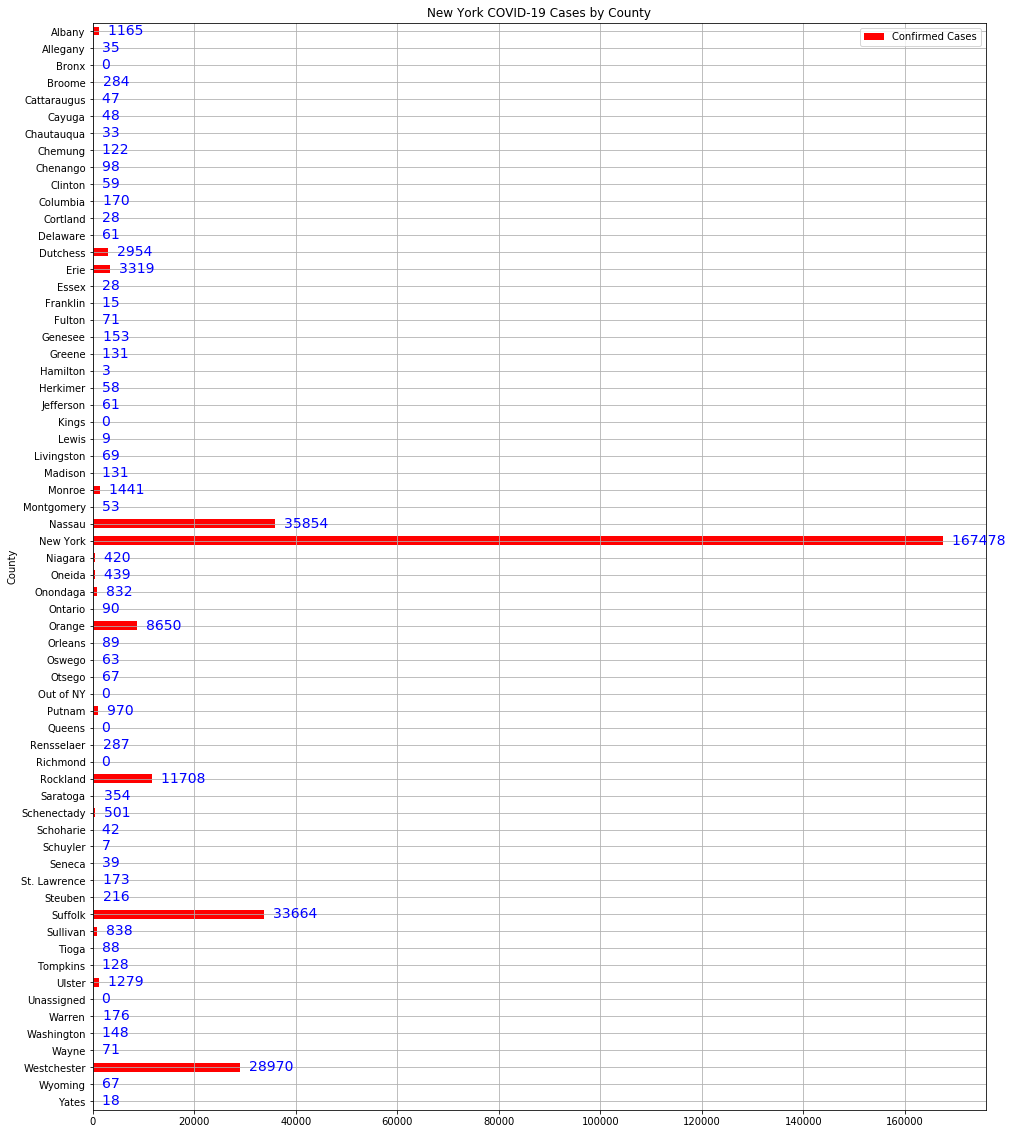

In [5]:
# Cases by COunty
counties_list = df_confirmed[df_confirmed['Province_State'].values == state]['Admin2'].values.tolist()
confirmed_county = []
for co in counties_list:
    comb_key = ', '.join((co,state,country))
    state_conf_df = df_confirmed[df_confirmed['Province_State'].values == state  ]
    county_conf_df = state_conf_df[state_conf_df['Admin2'][0:] == co]
    cases = county_conf_df[dates[-1]].values[0]
    #cases = df_confirmed[df_confirmed['Province_State'].values == state  ][df_confirmed[df_confirmed['Province_State'].values == state  ]['Admin2'][0:] == co][dates[-1]].values[0]
    #print(comb_key)
    co_df = df_confirmed[df_confirmed['Combined_Key'].values == comb_key].copy(deep=True)
    #print(co,cases)
    confirmed_county.append(cases)
    
confirmed_county_df = pd.DataFrame({'County' : counties_list,'Confirmed Cases' : confirmed_county})

confirmed_county_df.set_index('County',inplace=True)
confirmed_county_df.sort_values(by='County',ascending=False,inplace=True)

fig, ax = plt.subplots(figsize=(16,20))
confirmed_county_df.plot(ax=ax,kind='barh',grid=True,title=state+' COVID-19 Cases by County',color='red')

style = dict(size=14, color='blue')

for i, v in enumerate(confirmed_county_df.values):
    ax.text(v[0]+5,i-.2, '  '+str(v[0]), **style)

plt.show()
#sub = df_confirmed[df_confirmed['Province_State'].values == state  ]
#df_confirmed[df_confirmed['Province_State'].values == state  ][df_confirmed[df_confirmed['Province_State'].values == state  ]['Admin2'][0:] == 'New York'][dates[-1]].values[0]

## State Chart of Confirmed COVID-19 Cases

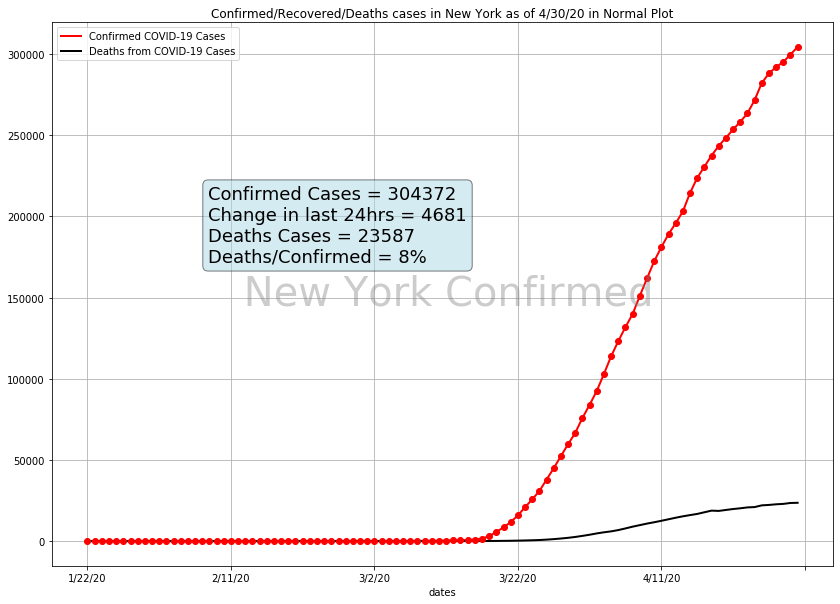

In [6]:
## Plot the raw data (not logarithmic)
fig, ax = plt.subplots(figsize=(14,10))
#us_df = pd.DataFrame(usa[dates].sum(), columns=[colname])

by_state_conf_cum.plot(ax=ax,c='red', lw=2,title='Confirmed/Recovered/Deaths cases in '+state+' as of '+str(by_state_conf_cum.index[-1])+' in Normal Plot')
#us_df_recovered_cum.plot(ax=ax,c='green', lw=2)
by_state_death_cum.plot(ax=ax,c='black', lw=2)

ax.plot(by_state_conf_cum[colname],'o',c='red',lw=8)

last_conf = by_state_conf_cum[colname][-1:][0]
#last_recov = us_df_recovered_cum[colname_recovered][-1:][0]
last_death = by_state_death_cum[colname_deaths][-1:][0]
last_conf_change = by_state_conf_cum[colname][-1:][0] - by_state_conf_cum[colname][-2:][0]

textstr = '\n'.join((
        r'Confirmed Cases = %.0f' % (last_conf, ),
        r'Change in last 24hrs = %.0f' % (last_conf_change,),
        r'Deaths Cases = %.0f' % (last_death, ),
        r'Deaths/Confirmed = %.0f%%' % (last_death*100/last_conf, )))

ax.text(0.5,
        0.5,
        ' '+state + ' Confirmed',
        horizontalalignment='center',
        color='gray',
        fontsize=40,
        alpha=0.4,
        verticalalignment='center',
        transform=ax.transAxes)

props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
ax.text(0.2, 0.70, textstr, transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)

ax.grid(True,which="both")


## State Chart of Change in Confirmed and Death

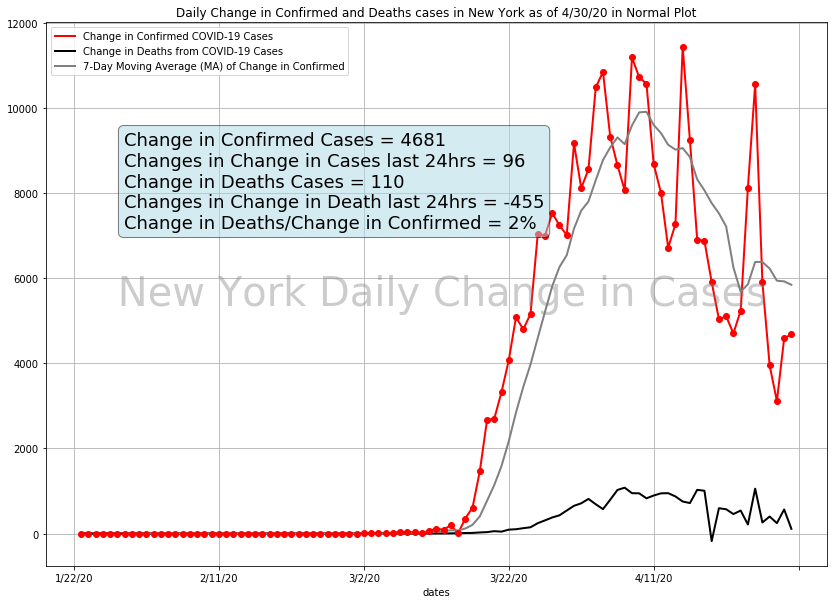

In [7]:
## Plot the raw data (not logarithmic)
fig, ax = plt.subplots(figsize=(14, 10))
#us_df = pd.DataFrame(usa[dates].sum(), columns=[colname])

MAperiod = 7
by_state_conf_cum['7-Day Moving Average (MA)'] = by_state_conf_cum[
    colname].diff(1).rolling(window=MAperiod).mean()

by_state_conf_cum[colname].diff(1).plot(
    ax=ax,
    c='red',
    lw=2,
    title='Daily Change in Confirmed and Deaths cases in ' + state +
    ' as of ' + str(by_state_conf_cum.index[-1]) + ' in Normal Plot')

#us_df_recovered_cum.plot(ax=ax,c='green', lw=2)
by_state_death_cum[colname_deaths].diff(1).plot(ax=ax, c='black', lw=2)

by_state_conf_cum['7-Day Moving Average (MA)'].plot(ax=ax, c='gray', lw=2)

ax.plot(by_state_conf_cum[colname].diff(1), 'o', c='red', lw=8)

last_conf = by_state_conf_cum[colname].diff(1)[-1:][0]
#last_recov = us_df_recovered_cum[colname_recovered][-1:][0]
last_death = by_state_death_cum[colname_deaths].diff(1)[-1:][0]
last_conf_change = by_state_conf_cum[colname].diff(
    1)[-1:][0] - by_state_conf_cum[colname].diff(1)[-2:][0]
last_death_change = by_state_death_cum[colname_deaths].diff(
    1)[-1:][0] - by_state_death_cum[colname_deaths].diff(1)[-2:][0]

textstr = '\n'.join(
    (r'Change in Confirmed Cases = %.0f' % (last_conf, ),
     r'Changes in Change in Cases last 24hrs = %.0f' % (last_conf_change, ),
     r'Change in Deaths Cases = %.0f' % (last_death, ),
     r'Changes in Change in Death last 24hrs = %.0f' %
     (last_death_change, ), r'Change in Deaths/Change in Confirmed = %.0f%%' %
     (last_death * 100 / last_conf, )))

ax.text(0.5,
        0.5,
        ' ' + state + ' Daily Change in Cases',
        horizontalalignment='center',
        color='gray',
        fontsize=40,
        alpha=0.4,
        verticalalignment='center',
        transform=ax.transAxes)

props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
ax.text(0.1,
        0.80,
        textstr,
        transform=ax.transAxes,
        fontsize=18,
        verticalalignment='top',
        bbox=props)

ax.grid(True, which="both")
ax.legend([
    'Change in ' + colname, 'Change in ' + colname_deaths,
    '7-Day Moving Average (MA) of Change in Confirmed'
])
plt.show()

## County Chart of Confirmed COVID-19 Cases

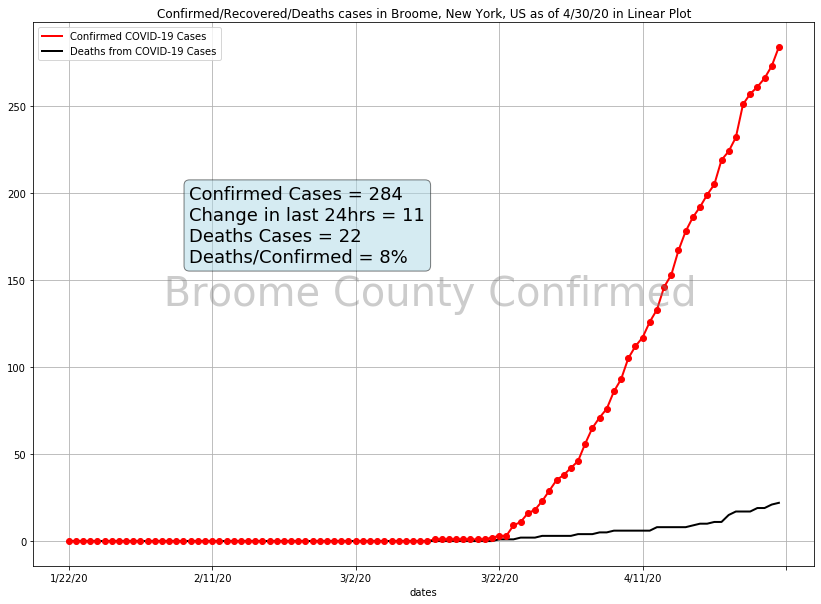

In [8]:
## Plot the raw data (not logarithmic)
fig, ax = plt.subplots(figsize=(14,10))
#us_df = pd.DataFrame(usa[dates].sum(), columns=[colname])

by_county_conf_cum.plot(ax=ax,c='red', lw=2,title='Confirmed/Recovered/Deaths cases in '+loc_key+' as of '+str(by_county_conf_cum.index[-1])+' in Linear Plot')
#us_df_recovered_cum.plot(ax=ax,c='green', lw=2)
by_county_death_cum.plot(ax=ax,c='black', lw=2)

ax.plot(by_county_conf_cum[colname],'o',c='red',lw=8)

last_conf = by_county_conf_cum[colname][-1:].values[0]
#print(last_conf)
#last_recov = us_df_recovered_cum[colname_recovered][-1:][0]
last_death = by_county_death_cum[colname_deaths][-1:].values[0]
last_conf_change = by_county_conf_cum[colname][-1:].values[0] - by_county_conf_cum[colname][-2:].values[0]

textstr = '\n'.join((
        r'Confirmed Cases = %.0f' % (last_conf, ),
        r'Change in last 24hrs = %.0f' % (last_conf_change,),
        r'Deaths Cases = %.0f' % (last_death, ),
        r'Deaths/Confirmed = %.0f%%' % (last_death*100/last_conf, )))

ax.text(0.5,
        0.5,
        ' '+county + ' County Confirmed',
        horizontalalignment='center',
        color='gray',
        fontsize=40,
        alpha=0.4,
        verticalalignment='center',
        transform=ax.transAxes)
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
ax.text(0.2, 0.70, textstr, transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)

ax.grid(True,which="both")

## County Chart of New Confirmed COVID-19 Cases

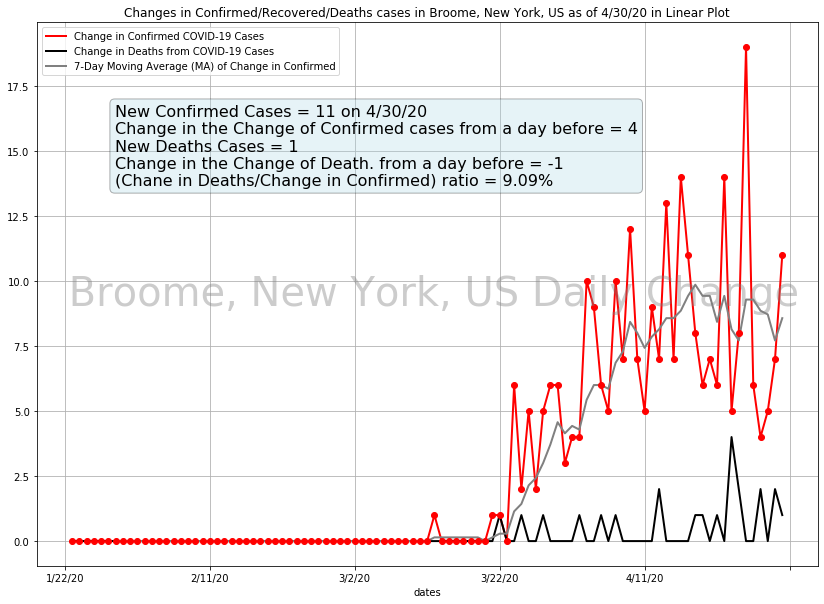

In [9]:
## Plot the raw data (not logarithmic)
fig, ax = plt.subplots(figsize=(14, 10))

by_county_conf_cum[colname].diff(1).plot(ax=ax,c='red',lw=2, 
                              title='Changes in Confirmed/Recovered/Deaths cases in ' + loc_key +' as of ' + str(by_county_conf_cum.index[-1]) +' in Linear Plot')
#us_df_recovered_cum[colname_recovered].diff(1).plot(ax=ax, c='green', lw=2)
by_county_death_cum[colname_deaths].diff(1).plot(ax=ax, c='black', lw=2)

last_conf = by_county_conf_cum[colname].diff(1)[-1:].values[0]
#last_recov = us_df_recovered_cum[colname_recovered].diff(1)[-1:][0]
last_death = by_county_death_cum[colname_deaths].diff(1)[-1:].values[0]
last_conf_change = by_county_conf_cum[colname].diff(1)[-1:].values[0] - by_county_conf_cum[
    colname].diff(1)[-2:].values[0]

#last_recov_change = us_df_recovered_cum[colname_recovered].diff(1)[-1:][0] - us_df_recovered_cum[
#    colname_recovered].diff(1)[-2:][0]


last_death_change = by_county_death_cum[colname_deaths].diff(1)[-1:].values[0] - by_county_death_cum[
    colname_deaths].diff(1)[-2:].values[0]


MAperiod = 7
TheCurveMA_df = pd.DataFrame()
TheCurveMA_df['7-Day Moving Average (MA)'] = by_county_conf_cum[colname].diff(1).rolling(
    window=MAperiod).mean()

TheCurveMA_df.plot(
    ax=ax,
    c='gray',
    lw=2)


ax.plot(by_county_conf_cum[colname].diff(1), 'o', c='red', lw=8,label='_Hidden',)


textstr = '\n'.join(
    (r'New Confirmed Cases = %.0f on ' % (last_conf, ) +  str(by_county_conf_cum.index[-1]) ,
     r'Change in the Change of Confirmed cases from a day before = %.0f' % (last_conf_change, ),
     r'New Deaths Cases = %.0f' % (last_death, ),
     r'Change in the Change of Death. from a day before = %.0f' % (last_death_change, ),
     r'(Chane in Deaths/Change in Confirmed) ratio = %.2f%%' % (last_death * 100 / last_conf, )))

props = dict(boxstyle='round', facecolor='lightblue', alpha=0.3)
ax.text(0.1,
        0.85,
        textstr,
        transform=ax.transAxes,
        fontsize=16,
        fontfamily='sans-serif',
        verticalalignment='top',
        bbox=props)

ax.text(0.5,
        0.5,
        ' '+loc_key + ' Daily Change',
        horizontalalignment='center',
        color='gray',
        fontsize=40,
        alpha=0.4,
        verticalalignment='center',
        transform=ax.transAxes)

ax.grid(True, which="both")
ax.legend(['Change in '+colname, 'Change in '+colname_deaths, '7-Day Moving Average (MA) of Change in Confirmed'])
plt.show()

## Calculate R-naught 

### Form more info on R-naught, check https://en.wikipedia.org/wiki/Basic_reproduction_number

In [10]:
## ASSUMPTION:
##    1) In early stages of contagion, there is NO limiting factor for the spreading of virus
##    2) Uninficted Population is very close to total population
##    3) Assume Free movement (No lockdowns) of individuals in and out of areas affected by virus
##

df_confirmed = GetCSVFromURL(confirmed_filename)

state_conf_df = df_confirmed[df_confirmed['Province_State'].values == state  ]
county_conf_df = state_conf_df[state_conf_df['Admin2'][0:] == county]

dates = df_confirmed.columns[11:]
df_confirmed = df_confirmed[dates].copy(deep=True)


by_state_conf_cum = pd.DataFrame(by_state_conf[dates].sum(), columns=[colname])
by_state_conf_cum['dates'] = dates
by_state_conf_cum.set_index('dates',inplace=True)

by_county_conf_cum = pd.DataFrame({'dates':dates,colname : county_conf_df[:11][dates].values.tolist()[0]})
by_county_conf_cum.set_index('dates',inplace=True)

by_county_death_cum = pd.DataFrame({'dates':dates,colname_deaths : county_death_df[:11][dates].values.tolist()[0]})
by_county_death_cum.set_index('dates',inplace=True)

In [11]:
# County First 
####################################################################
## Find Last day's total cases
TotalCasesToDateCounty = by_county_conf_cum[colname].values.tolist()[-1]

## Create a new Series that calculates the difference from day to day

ChangeFromDay2NextCounty = by_county_conf_cum[colname].diff(1)
#.iloc[-1]

#by_county_conf_cum2 = pd.DataFrame()
by_county_conf_cum2 = by_county_conf_cum[by_county_conf_cum[colname] > 0].copy(deep=True)
by_county_conf_cum2 = by_county_conf_cum[colname].dropna()
ChangeFromDay2NextPercentCounty = by_county_conf_cum2.pct_change(1).replace([np.inf, -np.inf], np.nan).dropna()
#print(ChangeFromDay2NextPercent)

## Find the Average change from day to day
AverageChangeFromDay2NextCounty = ChangeFromDay2NextCounty.mean()

## Create a series of R0 by calculating the ratio of one day to the day before
r0County = [] # Will record the ratio day to day, start from day 1 to last day
for day in range(1,len(ChangeFromDay2NextCounty)):
    if(ChangeFromDay2NextCounty[day-1:].values[0] == 0): # Avoid dividing by zero
        r0County.append(0)
    else:
        r0County.append(ChangeFromDay2NextCounty[day:].values[0]/ChangeFromDay2NextCounty[day-1:].values[0] )  

## Look back 20 days only. This is the most relevant data        
GoBackDays = 30
dict0County = {'Date' : by_county_conf_cum.index[-GoBackDays:].values, 'R-Naught' : r0County[-GoBackDays:]}
R_NaughtCounty= pd.DataFrame(dict0County)    
R_NaughtCounty = R_NaughtCounty.set_index('Date')

#print('ChangeFromDay2Next' , ChangeFromDay2Next[-1:].values[0])
DailyDeltaCounty = ChangeFromDay2NextCounty[-1:].values[0]

#print(us_df_cumulative['Actual USA COVID-19 Cases'][-2:][0])
DailyDeltaPercentCounty = 100 * DailyDeltaCounty /by_county_conf_cum[colname][-2:].values[0]

## County Descriptive Summary

In [12]:
#print report
print('-- This is for region :', loc_key)
print("-- Total cases as of " +str(by_county_conf_cum.index[-1:][0]) + "(End of day) is "+str(TotalCasesToDateCounty),
      'cases' )
print("-- Average case count change from one day to next = ", np.round(AverageChangeFromDay2NextCounty,2),' cases')

print("-- Change in "+loc_key+" confirmed COVID-19 cases FROM",
      str(by_county_conf_cum.index[-2:][0]), "TO", 
      str(by_county_conf_cum.index[-1:][0])+ "(End of day) is " + str(int(DailyDeltaCounty)),'cases',
      "OR " +str(np.round(DailyDeltaPercentCounty,2)) + '% from previous case total. ', '\n-- This is', 
      np.round((DailyDeltaCounty/AverageChangeFromDay2NextCounty),2) ,
      'Times the Average count in daily changes. \n-- The current Average PERCENT(%) change from day to day is' , 
      str(np.round(100*ChangeFromDay2NextPercentCounty.mean(),2) )+'%'+' from previous case total.', 
      "This means it's Above or Below (if negative) the average daily % change by "+ str(np.round(100*ChangeFromDay2NextPercentCounty.mean(),2) )+'%')
print("-- R-naught value as of end-of-day",str(by_county_conf_cum.index[-1:][0]), 'IS', 
      np.round(R_NaughtCounty['R-Naught'][-1:][0],4) )
print('-- The average R-naught from the past',GoBackDays,'days is', np.round( R_NaughtCounty['R-Naught'].mean(),4))

-- This is for region : Broome, New York, US
-- Total cases as of 4/30/20(End of day) is 284 cases
-- Average case count change from one day to next =  2.87  cases
-- Change in Broome, New York, US confirmed COVID-19 cases FROM 4/29/20 TO 4/30/20(End of day) is 11 cases OR 4.03% from previous case total.  
-- This is 3.83 Times the Average count in daily changes. 
-- The current Average PERCENT(%) change from day to day is 15.09% from previous case total. This means it's Above or Below (if negative) the average daily % change by 15.09%
-- R-naught value as of end-of-day 4/30/20 IS 1.5714
-- The average R-naught from the past 30 days is 1.2025


## County Chart of R-naught as a Time Series

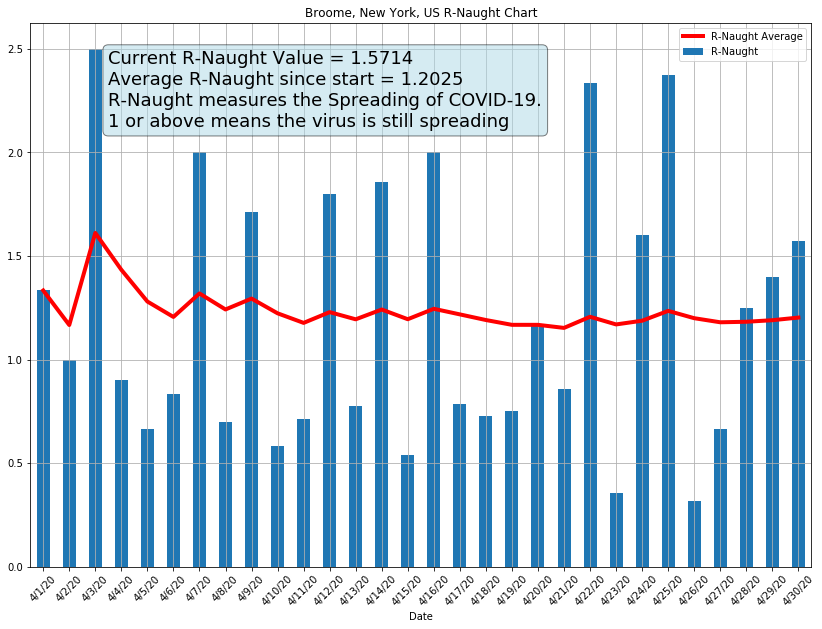

In [13]:
#R-naught
fig, ax = plt.subplots(figsize=(14,10))
ax.grid(True)
R_NaughtCounty['R-Naught'].plot(ax=ax,kind='bar',title=loc_key+' R-Naught Chart')
R_NaughtCounty['R-Naught Average'] = R_NaughtCounty.expanding().mean()
R_NaughtCounty['R-Naught Average'].plot(ax=ax,c='r',grid=True,lw=4)
ax.legend()

textstr = '\n'.join((
        r'Current R-Naught Value = %.4f' % (R_NaughtCounty['R-Naught'][-1:][0], ),
        r'Average R-Naught since start = %.4f' % (R_NaughtCounty['R-Naught Average'][-1:][0],),
        r'R-Naught measures the Spreading of COVID-19.',
        r'1 or above means the virus is still spreading'))

props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
ax.text(0.1, 0.95, textstr, transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)

_ = plt.xticks(rotation=45)


## State Calculate R-naught

In [14]:
#################### Second: State Level ##################################
####################################################################
## Find Last day's total cases
TotalCasesToDateState = by_state_conf_cum[colname].values.tolist()[-1]

## Create a new Series that calculates the difference from day to day

ChangeFromDay2NextState = by_state_conf_cum[colname].diff(1)
#.iloc[-1]

by_state_conf_cum2 = by_state_conf_cum[by_state_conf_cum[colname] > 0].copy(deep=True)
by_state_conf_cum2 = by_state_conf_cum[colname].dropna()
ChangeFromDay2NextPercentState = by_state_conf_cum2.pct_change(1).replace([np.inf, -np.inf], np.nan).dropna()
#print(ChangeFromDay2NextPercent)

## Find the Average change from day to day
AverageChangeFromDay2NextState = ChangeFromDay2NextState.mean()

## Create a series of R0 by calculating the ratio of one day to the day before
r0State = [] # Will record the ratio day to day, start from day 1 to last day
for day in range(1,len(ChangeFromDay2NextState)):
    if(ChangeFromDay2NextState[day-1:].values[0] == 0): # Avoid dividing by zero
        r0State.append(0)
    else:
        r0State.append(ChangeFromDay2NextState[day:].values[0]/ChangeFromDay2NextState[day-1:].values[0] )  

## Look back 20 days only. This is the most relevant data        
GoBackDays = 30
dict0State = {'Date' : by_state_conf_cum.index[-GoBackDays:].values, 'R-Naught' : r0State[-GoBackDays:]}
R_NaughtState = pd.DataFrame(dict0State)    
R_NaughtState = R_NaughtState.set_index('Date')

#print('ChangeFromDay2Next' , ChangeFromDay2Next[-1:].values[0])
DailyDeltaState = ChangeFromDay2NextState[-1:].values[0]

#print(us_df_cumulative['Actual USA COVID-19 Cases'][-2:][0])
DailyDeltaPercentState = 100 * DailyDeltaState /by_state_conf_cum[colname][-2:].values[0]

## State Descriptive Summary

In [15]:
#print report
print('-- This is for region :', state,country)
print("-- Total cases as of " +str(by_state_conf_cum.index[-1:][0]) + "(End of day) is "+str(TotalCasesToDateState),
      'cases' )
print("-- Average case count change from one day to next = ", np.round(AverageChangeFromDay2NextState,2),' cases')

print("-- Change in "+state+" confirmed COVID-19 cases FROM",
      str(by_state_conf_cum.index[-2:][0]), "TO", 
      str(by_state_conf_cum.index[-1:][0])+ "(End of day) is " + str(int(DailyDeltaState)),'cases',
      "OR " +str(np.round(DailyDeltaPercentState,2)) + '% from previous case total. ', '\n-- This is', 
      np.round((DailyDeltaState/AverageChangeFromDay2NextState),2) ,
      'Times the Average count in daily changes. \n-- The current Average PERCENT(%) change from day to day is' , 
      str(np.round(100*ChangeFromDay2NextPercentState.mean(),2) )+'%'+' from previous case total.', 
      "This means it's Above or Below (if negative) the average daily % change by "+ str(np.round(100*ChangeFromDay2NextPercentState.mean(),2) )+'%')
print("-- R-naught value as of end-of-day",str(by_state_conf_cum.index[-1:][0]), 'IS', 
      np.round(R_NaughtState['R-Naught'][-1:][0],4) )
print('-- The average R-naught from the past',GoBackDays,'days is', np.round( R_NaughtState['R-Naught'].mean(),4))

-- This is for region : New York US
-- Total cases as of 4/30/20(End of day) is 304372 cases
-- Average case count change from one day to next =  3074.46  cases
-- Change in New York confirmed COVID-19 cases FROM 4/29/20 TO 4/30/20(End of day) is 4681 cases OR 1.56% from previous case total.  
-- This is 1.52 Times the Average count in daily changes. 
-- The current Average PERCENT(%) change from day to day is 30.96% from previous case total. This means it's Above or Below (if negative) the average daily % change by 30.96%
-- R-naught value as of end-of-day 4/30/20 IS 1.0209
-- The average R-naught from the past 30 days is 1.0054


## State Chart of R-naught as a Time Series

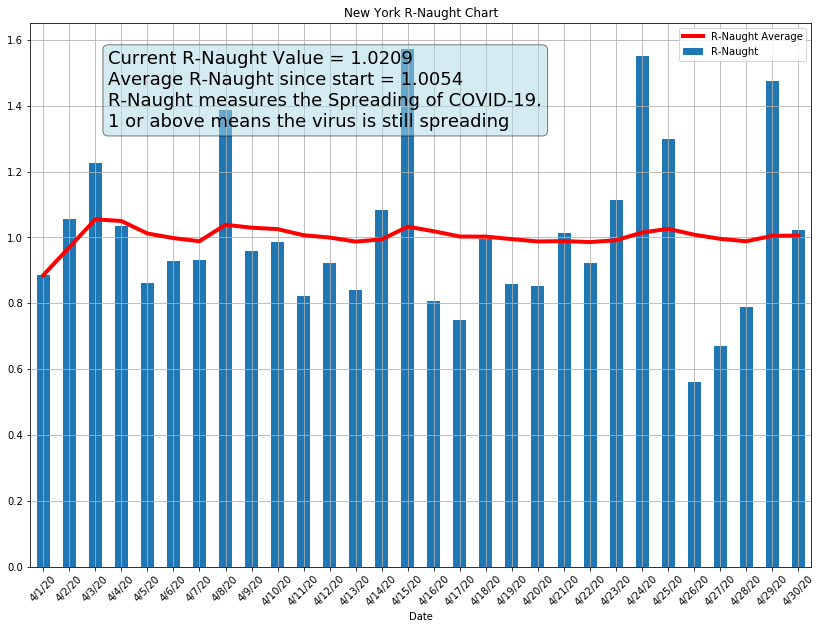

In [16]:
#R-naught
fig, ax = plt.subplots(figsize=(14,10))
ax.grid(True)
R_NaughtState['R-Naught'].plot(ax=ax,kind='bar',title=state+' R-Naught Chart')
R_NaughtState['R-Naught Average'] = R_NaughtState.expanding().mean()
R_NaughtState['R-Naught Average'].plot(ax=ax,c='r',grid=True,lw=4)
ax.legend()

textstr = '\n'.join((
        r'Current R-Naught Value = %.4f' % (R_NaughtState['R-Naught'][-1:][0], ),
        r'Average R-Naught since start = %.4f' % (R_NaughtState['R-Naught Average'][-1:][0],),
        r'R-Naught measures the Spreading of COVID-19.',
        r'1 or above means the virus is still spreading'))

props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
ax.text(0.1, 0.95, textstr, transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)

_ = plt.xticks(rotation=45)

In [17]:
## Find out the full path to 'jupyter' and update the line below with the path
!/home/sabawi/anaconda3/bin/jupyter nbconvert covid-19-r-naught-US-States.ipynb --no-input

[NbConvertApp] Converting notebook covid-19-r-naught-US-States.ipynb to html
[NbConvertApp] Writing 944219 bytes to covid-19-r-naught-US-States.html
